# <center> Recommender System </center>

## Data Extraction

### Load data from CSV

Not using user data for a while

Data is generated randomly using Excel

In [146]:
import pandas as pd
import os

DATA_DIR = os.path.join("data/synt_data_filtered/")
INFLUENCER_FILE = os.path.join(DATA_DIR, "data_content_influencer_categ.csv")
OWNER_FILE = os.path.join(DATA_DIR, "data_content_owner_categ.csv")
HISTORY_FILE = os.path.join(DATA_DIR, "historical_data.csv")

df_influencer = pd.read_csv(INFLUENCER_FILE)
# df_owner = pd.read_csv(OWNER_FILE)
df_history = pd.read_csv(HISTORY_FILE)

### Data Exploration

In [147]:
df_influencer.head(5)

,id,insta_follower,tiktok,youtube,categories,price_category
0,1723,200630,236512,167037,"Drama,Romance,School,Supernatural",HIGH
1,6306,102733,69192,50717,"Drama,School,Shounen",HIGH
2,19,466254,287409,328098,"Adventure,Drama,Supernatural",HIGH
3,18,339556,255650,287798,"Action,Adventure,Fantasy",HIGH
4,27,333186,189577,123542,"Adventure,Drama,Fantasy,Romance",HIGH


In [148]:
df_influencer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1303 non-null   int64 
 1   insta_follower  1303 non-null   int64 
 2   tiktok          1303 non-null   int64 
 3   youtube         1303 non-null   int64 
 4   categories      1303 non-null   object
 5   price_category  1303 non-null   object
dtypes: int64(4), object(2)
memory usage: 61.2+ KB


In [149]:
df_influencer.describe()

,id,insta_follower,tiktok,youtube
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,3767.317728,23592.914812,20366.650038,18125.808903
std,2119.923305,56824.709504,47009.376861,41317.243804
min,9.000000,91.000000,59.000000,47.000000
25%,1970.000000,1549.000000,1307.000000,1116.000000
50%,3644.000000,4636.000000,4029.000000,3297.000000
75%,5674.500000,18623.000000,16877.000000,15087.500000
max,7385.000000,717796.000000,532527.000000,462643.000000


In [150]:
df_history.head(5)

,own_id,inf_id,star_rating,sentiment_rating
0,97,2754,1,0.047637
1,239,253,1,0.102026
2,289,563,1,0.049284
3,354,1551,1,0.081933
4,354,1088,1,0.041584


In [151]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61223 entries, 0 to 61222
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   own_id            61223 non-null  int64  
 1   inf_id            61223 non-null  int64  
 2   star_rating       61223 non-null  int64  
 3   sentiment_rating  61223 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.9 MB


In [152]:
df_history.describe()

,own_id,inf_id,star_rating,sentiment_rating
count,61223.000000,61223.000000,61223.000000,61223.000000
mean,2453.847966,1174.385427,4.126717,0.774545
std,1441.009512,1260.831571,0.783129,0.160502
min,1.000000,9.000000,1.000000,0.000180
25%,1213.000000,253.000000,4.000000,0.674888
50%,2506.000000,682.000000,4.000000,0.787227
75%,3708.000000,1787.000000,5.000000,0.896776
max,5000.000000,7385.000000,5.000000,1.000000


## Data Transformation

### Data cleaning

#### Missing value

In [153]:
df_influencer.isnull().sum()

id                0
insta_follower    0
tiktok            0
youtube           0
categories        0
price_category    0
dtype: int64

In [154]:
df_history.isnull().sum()

own_id              0
inf_id              0
star_rating         0
sentiment_rating    0
dtype: int64

No missing value

#### Irrelevant Data / Invalid Data

Check if all history has valid influencer and owner ID

In [155]:
df_history["inf_id"].isin(df_influencer["id"]).all()

True

All history data has valid influencer and owner ID

### Data Normalization

Normalize influencer data: Scale follower count and One-hot categories

In [156]:
from sklearn.preprocessing import MinMaxScaler

follower_scaler = MinMaxScaler()

df_inf_norm = df_influencer.copy()
df_inf_norm[["insta_follower", "tiktok", "youtube"]] = follower_scaler.fit_transform(df_inf_norm[["insta_follower", "tiktok", "youtube"]])

one_hot_price = df_inf_norm['price_category'].str.get_dummies()
df_inf_norm = pd.concat([df_inf_norm, one_hot_price], axis=1)
df_inf_norm = df_inf_norm.drop('price_category', axis=1)

one_hot_categories = df_inf_norm['categories'].str.get_dummies(sep=',')
df_inf_norm = pd.concat([df_inf_norm, one_hot_categories], axis=1)
df_inf_norm = df_inf_norm.drop('categories', axis=1)

df_inf_norm.head()

,id,insta_follower,tiktok,youtube,HIGH,LOW,MEDIUM,Action,Adventure,Comedy,Drama,Fantasy,Romance,School,Sci-Fi,Shounen,Supernatural
0,1723,0.279417,0.444070,0.360985,1,0,0,0,0,0,1,0,1,1,0,0,1
1,6306,0.143014,0.129835,0.109534,1,0,0,0,0,0,1,0,0,1,0,1,0
2,19,0.649519,0.539657,0.709152,1,0,0,0,1,0,1,0,0,0,0,0,1
3,18,0.472987,0.480012,0.622035,1,0,0,1,1,0,0,1,0,0,0,0,0
4,27,0.464111,0.355924,0.266961,1,0,0,0,1,0,1,1,1,0,0,0,0


Remove some category

In [157]:
categories_count = df_inf_norm[df_inf_norm.columns[8:]].sum().sort_values(ascending=False)

column_name = list(categories_count.nlargest(10).index)
column_name
# plt.plot

['Comedy',
 'Adventure',
 'Fantasy',
 'Shounen',
 'Sci-Fi',
 'Drama',
 'Romance',
 'School',
 'Supernatural']

Combine star and sentiment rating

In [158]:
STAR_WEIGHT = 0.6
SENTIMENT_WEIGHT = 0.4

df_history["combined_rating"] = STAR_WEIGHT * df_history["star_rating"] / 5 + SENTIMENT_WEIGHT * df_history["sentiment_rating"]
df_history

,own_id,inf_id,star_rating,sentiment_rating,combined_rating
0,97,2754,1,0.047637,0.139055
1,239,253,1,0.102026,0.160810
2,289,563,1,0.049284,0.139714
3,354,1551,1,0.081933,0.152773
4,354,1088,1,0.041584,0.136634
...,...,...,...,...,...
61218,4994,31,5,1.000000,1.000000
61219,4994,61,5,0.960758,0.984303
61220,4994,9,5,1.000000,1.000000
61221,4994,1579,5,1.000000,1.000000


In [ ]:
rating_count = df_history.groupby("star_rating").count()
rating_count

,own_id,inf_id,sentiment_rating,combined_rating
star_rating,,,,
1,2768,2768,2768,2768
2,9217,9217,9217,9217
3,59531,59531,59531,59531
4,197295,197295,197295,197295
5,144635,144635,144635,144635


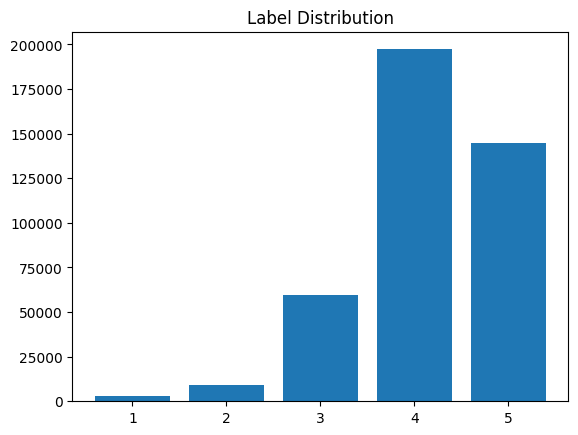

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Chart labels
rating_count = rating_count["own_id"].to_numpy()
ratings = range(1, 6)

# Show pie chart
plt.title("Label Distribution")
plt.bar(x=ratings, height=rating_count)
plt.show()

### Data Splitting

##### Creating user profile

In [160]:
df_history = df_history.drop(["star_rating", "sentiment_rating"], axis=1)
df_inf_features = pd.merge(df_history, df_inf_norm, left_on='inf_id', right_on='id', how='left')
df_inf_features.head()

,own_id,inf_id,combined_rating,id,insta_follower,tiktok,youtube,HIGH,LOW,MEDIUM,Action,Adventure,Comedy,Drama,Fantasy,Romance,School,Sci-Fi,Shounen,Supernatural
0,97,2754,0.139055,2754,0.002135,0.003606,0.003078,0,1,0,1,1,0,0,1,0,0,1,0,0
1,239,253,0.160810,253,0.685577,0.533764,0.475914,1,0,0,1,1,0,0,1,0,0,0,0,0
2,289,563,0.139714,563,0.159015,0.124633,0.112476,1,0,0,1,0,0,0,0,0,0,0,1,1
3,354,1551,0.152773,1551,0.049355,0.037595,0.036194,0,0,1,0,0,1,0,0,1,0,0,0,0
4,354,1088,0.136634,1088,0.075247,0.061705,0.038978,0,0,1,0,0,1,0,0,0,0,0,0,0


In [161]:
OWNER_FEATURES = df_inf_norm.columns[1:]

# Copy influencer features combined with history data
df_own_norm = df_inf_features.copy()

# Multiply influencer feature with user rating
df_own_norm[OWNER_FEATURES] = df_own_norm[OWNER_FEATURES].mul(df_own_norm['combined_rating'], axis=0) 

# Drop unimportant features
df_own_norm = df_own_norm.drop(["inf_id", "id", "combined_rating"], axis=1)

# Average those with same owner id to make user profile
df_own_norm = df_own_norm.groupby('own_id').mean().reset_index()
df_own_norm.rename(columns={'own_id': 'id'}, inplace=True)

df_own_norm.head()

,id,insta_follower,tiktok,youtube,HIGH,LOW,MEDIUM,Action,Adventure,Comedy,Drama,Fantasy,Romance,School,Sci-Fi,Shounen,Supernatural
0,1,0.792878,0.792878,0.671417,0.792878,0.000000,0.000000,0.792878,0.000000,0.792878,0.792878,0.000000,0.000000,0.792878,0.000000,0.000000,0.792878
1,2,0.203405,0.214935,0.204565,0.559829,0.019473,0.338743,0.376411,0.489933,0.503433,0.198128,0.315105,0.258741,0.088185,0.070577,0.432108,0.332270
2,3,0.563350,0.490696,0.440533,0.953231,0.000000,0.000000,0.300421,0.655169,0.625819,0.461167,0.327412,0.160746,0.133754,0.164307,0.166667,0.628178
3,4,0.405324,0.395416,0.359555,0.668876,0.000000,0.128685,0.643137,0.254240,0.642494,0.100003,0.435046,0.000000,0.100003,0.133826,0.254240,0.535049
4,5,0.367334,0.347676,0.313048,0.683969,0.000000,0.086025,0.344619,0.316013,0.529131,0.279185,0.191960,0.150963,0.106851,0.000000,0.059096,0.637131


##### Process feature and label

In [162]:
# Remove ID and labels
df_inf_features = df_inf_features.drop(["own_id", "inf_id", "id", "combined_rating"], axis=1)
INFLUENCER_FEATURE_COUNT = len(df_inf_features.columns)

df_inf_features.head()

,insta_follower,tiktok,youtube,HIGH,LOW,MEDIUM,Action,Adventure,Comedy,Drama,Fantasy,Romance,School,Sci-Fi,Shounen,Supernatural
0,0.002135,0.003606,0.003078,0,1,0,1,1,0,0,1,0,0,1,0,0
1,0.685577,0.533764,0.475914,1,0,0,1,1,0,0,1,0,0,0,0,0
2,0.159015,0.124633,0.112476,1,0,0,1,0,0,0,0,0,0,0,1,1
3,0.049355,0.037595,0.036194,0,0,1,0,0,1,0,0,1,0,0,0,0
4,0.075247,0.061705,0.038978,0,0,1,0,0,1,0,0,0,0,0,0,0


In [163]:
# Join history and owner data by own_id
df_own_features = pd.merge(df_history, df_own_norm, left_on='own_id', right_on='id', how='left')

df_own_features.head()

,own_id,inf_id,combined_rating,id,insta_follower,tiktok,youtube,HIGH,LOW,MEDIUM,Action,Adventure,Comedy,Drama,Fantasy,Romance,School,Sci-Fi,Shounen,Supernatural
0,97,2754,0.139055,97,0.063334,0.072687,0.072856,0.157913,0.164169,0.362335,0.230078,0.196333,0.427517,0.139069,0.200934,0.116409,0.143602,0.155958,0.266912,0.166435
1,239,253,0.160810,239,0.172188,0.194127,0.191690,0.393427,0.000000,0.373100,0.319690,0.144296,0.473209,0.253422,0.321111,0.402215,0.316721,0.162045,0.135548,0.181114
2,289,563,0.139714,289,0.152128,0.170242,0.168472,0.358996,0.044821,0.198997,0.268350,0.198316,0.267149,0.177866,0.134755,0.167720,0.207200,0.118712,0.098317,0.183859
3,354,1551,0.152773,354,0.083801,0.093698,0.092456,0.221362,0.046844,0.203531,0.150297,0.098169,0.283764,0.118009,0.123659,0.172813,0.143477,0.043097,0.132168,0.157321
4,354,1088,0.136634,354,0.083801,0.093698,0.092456,0.221362,0.046844,0.203531,0.150297,0.098169,0.283764,0.118009,0.123659,0.172813,0.143477,0.043097,0.132168,0.157321


In [164]:
# Remove ID and labels
df_own_features = df_own_features.drop(["own_id", "inf_id", "id", "combined_rating"], axis=1)
OWNER_FEATURE_COUNT = len(df_own_features.columns)

df_own_features.head()

,insta_follower,tiktok,youtube,HIGH,LOW,MEDIUM,Action,Adventure,Comedy,Drama,Fantasy,Romance,School,Sci-Fi,Shounen,Supernatural
0,0.063334,0.072687,0.072856,0.157913,0.164169,0.362335,0.230078,0.196333,0.427517,0.139069,0.200934,0.116409,0.143602,0.155958,0.266912,0.166435
1,0.172188,0.194127,0.191690,0.393427,0.000000,0.373100,0.319690,0.144296,0.473209,0.253422,0.321111,0.402215,0.316721,0.162045,0.135548,0.181114
2,0.152128,0.170242,0.168472,0.358996,0.044821,0.198997,0.268350,0.198316,0.267149,0.177866,0.134755,0.167720,0.207200,0.118712,0.098317,0.183859
3,0.083801,0.093698,0.092456,0.221362,0.046844,0.203531,0.150297,0.098169,0.283764,0.118009,0.123659,0.172813,0.143477,0.043097,0.132168,0.157321
4,0.083801,0.093698,0.092456,0.221362,0.046844,0.203531,0.150297,0.098169,0.283764,0.118009,0.123659,0.172813,0.143477,0.043097,0.132168,0.157321


In [165]:
# Get labels from history data
df_labels = df_history["combined_rating"]
df_labels.head()

0    0.139055
1    0.160810
2    0.139714
3    0.152773
4    0.136634
Name: combined_rating, dtype: float64

##### Generate train, validation, and test dataset

In [166]:
# Shuffle and batch data
import tensorflow as tf

SHUFFLE_BUFFER = 1000

dataset = tf.data.Dataset.from_tensor_slices(({"inf_feature": df_inf_features, "own_feature": df_own_features}, df_labels))
dataset = dataset.shuffle(SHUFFLE_BUFFER) 

dataset.element_spec

({'inf_feature': TensorSpec(shape=(16,), dtype=tf.float64, name=None),
  'own_feature': TensorSpec(shape=(16,), dtype=tf.float64, name=None)},
 TensorSpec(shape=(), dtype=tf.float64, name=None))

In [167]:
# Generate training, validation, and testing data
DATASET_SIZE = dataset.cardinality().numpy()
TRAIN_SIZE = int(DATASET_SIZE * 0.9)
VAL_SIZE = int(DATASET_SIZE * 0.05)
TEST_SIZE = DATASET_SIZE - TRAIN_SIZE - VAL_SIZE

train_dataset = dataset.take(TRAIN_SIZE)
val_dataset = dataset.skip(TRAIN_SIZE).take(VAL_SIZE)
test_dataset = dataset.skip(TRAIN_SIZE + VAL_SIZE).take(TEST_SIZE)

print(f"Training dataset has {train_dataset.cardinality().numpy()} data")
print(f"Validation dataset has {val_dataset.cardinality().numpy()} data")
print(f"Testing dataset has {test_dataset.cardinality().numpy()} data")

Training dataset has 55100 data
Validation dataset has 3061 data
Testing dataset has 3062 data


In [168]:
# Batching
BATCH_SIZE = 32
REPEAT = 2

train_dataset = train_dataset.batch(BATCH_SIZE).repeat(REPEAT)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

## Creating Model

Model consists of two neural networks that would be combined with Dot layer. The first neural network has influencer features as input and a vector as an output. The second one has owner features as input and a vector as an output. These two vectors will be combined with Dot layer and produces a single combined rating

In [169]:
VECTOR_SIZE = 128
# tf.random.set_seed(1)

model_influencer = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=VECTOR_SIZE, activation='linear'),
])

# create the influencer input and point to the base network
input_influencer = tf.keras.layers.Input(shape=(INFLUENCER_FEATURE_COUNT), name="inf_feature")
vi = model_influencer(input_influencer)
vi = tf.linalg.l2_normalize(vi, axis=1)

model_owner = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=VECTOR_SIZE, activation='linear'),
])

# create the owner input and point to the base network
input_owner = tf.keras.layers.Input(shape=(OWNER_FEATURE_COUNT), name="own_feature")
vo = model_owner(input_owner)
vo = tf.linalg.l2_normalize(vo, axis=1)

# compute the dot product of the two vectors vi and vo
output = tf.keras.layers.Dot(axes=1)([vi, vo])

# specify the inputs and output of the model
model = tf.keras.Model([input_influencer, input_owner], output)

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inf_feature (InputLayer)       [(None, 16)]         0           []                               
                                                                                                  
 own_feature (InputLayer)       [(None, 16)]         0           []                               
                                                                                                  
 sequential_14 (Sequential)     (None, 128)          94912       ['inf_feature[0][0]']            
                                                                                                  
 sequential_15 (Sequential)     (None, 128)          94912       ['own_feature[0][0]']            
                                                                                            

In [170]:
LEARNING_RATE = 1e-3

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=["mse"])

history = model.fit(train_dataset, validation_data=val_dataset, epochs=20)

Epoch 1/20
3444/3444 [==============================] - 9s 2ms/step - loss: 0.0292 - mse: 0.0031 - val_loss: 0.0103 - val_mse: 2.2041e-04
Epoch 2/20
3444/3444 [==============================] - 9s 3ms/step - loss: 0.0350 - mse: 0.0071 - val_loss: 0.0103 - val_mse: 2.1712e-04
Epoch 3/20
3444/3444 [==============================] - 9s 3ms/step - loss: 0.0393 - mse: 0.0101 - val_loss: 0.0102 - val_mse: 2.0506e-04
Epoch 4/20
3444/3444 [==============================] - 9s 3ms/step - loss: 0.0368 - mse: 0.0085 - val_loss: 0.0106 - val_mse: 2.1433e-04
Epoch 5/20
3444/3444 [==============================] - 10s 3ms/step - loss: 0.0398 - mse: 0.0103 - val_loss: 0.0101 - val_mse: 2.4322e-04
Epoch 6/20
3444/3444 [==============================] - 9s 3ms/step - loss: 0.0384 - mse: 0.0094 - val_loss: 0.0104 - val_mse: 2.1183e-04
Epoch 7/20
3444/3444 [==============================] - 9s 3ms/step - loss: 0.0405 - mse: 0.0107 - val_loss: 0.0105 - val_mse: 2.0496e-04
Epoch 8/20
3444/3444 [===========

### Evaluation with test dataset

In [171]:
test_predict = model.predict(test_dataset)
test_predict

96/96 [==============================] - 0s 2ms/step


array([[0.99344844],
       [0.9933511 ],
       [0.99406743],
       ...,
       [0.9942401 ],
       [0.99376744],
       [0.99398005]], dtype=float32)

In [172]:
# Get real label
test_labels = np.array([])
for batch in test_dataset:
    test_labels = np.concatenate([test_labels, batch[1].numpy()])

test_labels

array([1.        , 1.        , 0.97502757, ..., 1.        , 0.98351269,
       1.        ])

In [173]:
compare_test = pd.concat([pd.DataFrame(test_predict, columns=["predicted"]), 
                     pd.DataFrame(test_labels, columns=["real"])], axis=1)

compare_test["error"] = abs(compare_test["predicted"] - compare_test["real"])

compare_test

,predicted,real,error
0,0.993448,1.000000,0.006552
1,0.993351,1.000000,0.006649
2,0.994067,0.975028,0.019040
3,0.994268,0.965453,0.028815
4,0.995169,1.000000,0.004831
...,...,...,...
3057,0.993252,0.983805,0.009447
3058,0.993343,0.982309,0.011034
3059,0.994240,1.000000,0.005760
3060,0.993767,0.983513,0.010255


In [179]:
compare_test[compare_test["error"] >= 5e-1]

,predicted,real,error


In [175]:
train_predict = model.predict(train_dataset)
train_predict

3444/3444 [==============================] - 5s 1ms/step


array([[0.9951158 ],
       [0.993181  ],
       [0.99273175],
       ...,
       [0.994017  ],
       [0.9940536 ],
       [0.9934304 ]], dtype=float32)

In [176]:
# Get real label
train_labels = np.array([])
for batch in train_dataset:
    train_labels = np.concatenate([train_labels, batch[1].numpy()])

train_labels

array([0.130808  , 0.19690421, 0.37732975, ..., 1.        , 1.        ,
       0.97743598])

In [177]:
compare_train = pd.concat([pd.DataFrame(train_predict, columns=["predicted"]), 
                     pd.DataFrame(train_labels, columns=["real"])], axis=1)

compare_train["error"] = abs(compare_train["predicted"] - compare_train["real"])

compare_train

,predicted,real,error
0,0.995116,0.130808,0.864308
1,0.993181,0.196904,0.796277
2,0.992732,0.377330,0.615402
3,0.992655,0.382217,0.610438
4,0.993705,0.184581,0.809124
...,...,...,...
110195,0.995242,1.000000,0.004758
110196,0.994512,0.963872,0.030640
110197,0.994017,1.000000,0.005983
110198,0.994054,1.000000,0.005946


In [178]:
compare_train[compare_train["error"] >= 5e-1]

,predicted,real,error
0,0.995116,0.130808,0.864308
1,0.993181,0.196904,0.796277
2,0.992732,0.377330,0.615402
3,0.992655,0.382217,0.610438
4,0.993705,0.184581,0.809124
...,...,...,...
60702,0.993894,0.171706,0.822188
61024,0.993381,0.436949,0.556432
61387,0.994521,0.183093,0.811428
61731,0.993386,0.373834,0.619551
